<a href="https://colab.research.google.com/github/JyothikaGupta/team8/blob/main/hackathon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#CODE HACKATHON 

**Problem Statement-3**

Customer Segmentation Using Machine Learning

In [4]:
#Import the required software libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import cluster

In [5]:
#Load the data
from google.colab import files 
k = files.upload()

Saving data.csv to data.csv


In [6]:
#Store the data into a data frame
x = pd.read_csv('data.csv',encoding= 'unicode_escape')


In [7]:
#Print the first 5 rows of the data frame.
x.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [8]:
#Data Cleanup and Transformation

#Remove records that do not have a customer ID.
x = x[pd.notnull(x['CustomerID'])]

In [9]:
# The lambda function will be used to sum the number of invoices by Customer ID
x['Sales'] = x['Quantity'] * x['UnitPrice']
x.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34


In [10]:

c_x = x.groupby('CustomerID').agg({'Sales': sum, 
                               'InvoiceNo': lambda x: x.nunique()})
c_x.head(5)

,Sales,InvoiceNo
CustomerID,,
12346.0,0.00,2
12347.0,4310.00,7
12348.0,1797.24,4
12349.0,1757.55,1
12350.0,334.40,1


In [11]:
c_x.columns = ['TotalSales', 'OrderCount'] 

c_x.head(5)

,TotalSales,OrderCount
CustomerID,,
12346.0,0.00,2
12347.0,4310.00,7
12348.0,1797.24,4
12349.0,1757.55,1
12350.0,334.40,1


In [12]:
#Creating a new column for the average order value for each customer.
c_x['AvgOrderValue'] = c_x['TotalSales'] / c_x['OrderCount']
c_x.head()

,TotalSales,OrderCount,AvgOrderValue
CustomerID,,,
12346.0,0.00,2,0.000000
12347.0,4310.00,7,615.714286
12348.0,1797.24,4,449.310000
12349.0,1757.55,1,1757.550000
12350.0,334.40,1,334.400000


In [13]:
#Normalizing the Data
r_x = c_x.rank(method='first')
n_x = (r_x - r_x.mean()) / r_x.std()
n_x.head()

,TotalSales,OrderCount,AvgOrderValue
CustomerID,,,
12346.0,-1.698182,-0.691236,-1.698182
12347.0,1.479522,1.026356,1.431195
12348.0,0.956639,0.344231,1.149155
12349.0,0.934456,-1.731457,1.702143
12350.0,-0.704704,-1.730664,0.669845


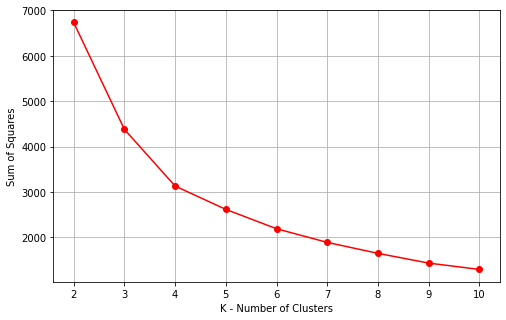

In [17]:
#We used Elbow Method:- drawing a line plot between SSE (Sum of Squared errors) vs a number of clusters
sse = []
krange = list(range(2,11))
X = n_x[['TotalSales','OrderCount','AvgOrderValue']].values
for n in krange:
    model = cluster.KMeans(n_clusters=n, random_state=3)
    model.fit_predict(X)
    cluster_assignments = model.labels_
    centers = model.cluster_centers_
    sse.append(np.sum((X - centers[cluster_assignments]) ** 2))

# Plot the results.
fig = plt.figure(figsize = (8,5))
plt.plot(krange, sse, marker='o',color='red')
plt.xlabel("K - Number of Clusters")
plt.ylabel("Sum of Squares")
plt.grid(True)
plt.show()


In [19]:
#training the k-means clustering model_ 
kmeans = KMeans(n_clusters=4).fit(n_x[['TotalSales', 'OrderCount', 'AvgOrderValue']])
f_c = n_x[['TotalSales', 'OrderCount', 'AvgOrderValue']].copy(deep=True)
f_c['Cluster'] = kmeans.labels_
f_c.head(5)

,TotalSales,OrderCount,AvgOrderValue,Cluster
CustomerID,,,,
12346.0,-1.698182,-0.691236,-1.698182,1
12347.0,1.479522,1.026356,1.431195,2
12348.0,0.956639,0.344231,1.149155,2
12349.0,0.934456,-1.731457,1.702143,0
12350.0,-0.704704,-1.730664,0.669845,0


In [25]:
#creating a new data frame from the previous data frame
df = c_x
frame = pd.DataFrame(df)
frame['Cluster'] = f_c['Cluster']
frame.head(5)

,TotalSales,OrderCount,AvgOrderValue,Cluster
CustomerID,,,,
12346.0,0.00,2,0.000000,1
12347.0,4310.00,7,615.714286,2
12348.0,1797.24,4,449.310000,2
12349.0,1757.55,1,1757.550000,0
12350.0,334.40,1,334.400000,0


Text(0, 0.5, 'Total Sales ($)')

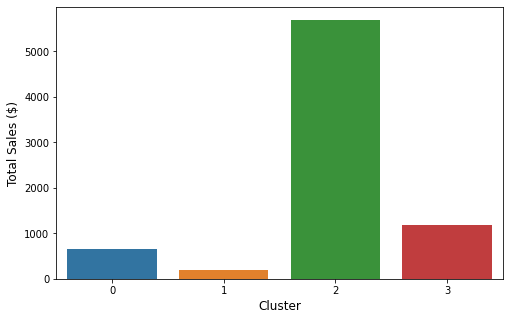

In [26]:
#Visualizing the relationship between total sales and each cluster.
fig = plt.figure(figsize = (8,5))
sns.barplot(x = 'Cluster', 
            y = 'TotalSales', 
            data = frame,
            ci = None)

# Add labels.
plt.xlabel("Cluster", size=12)
plt.ylabel("Total Sales ($)", size=12)

Text(0, 0.5, 'Order Count')

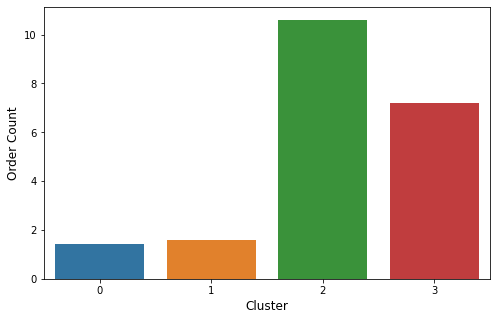

In [27]:
#Visualizing the relationship between order count and each cluster.
fig = plt.figure(figsize = (8,5))
sns.barplot(x = 'Cluster', 
            y = 'OrderCount', 
            data = frame,
            ci = None)
# Add labels
plt.xlabel("Cluster", size=12)
plt.ylabel("Order Count", size=12)

Text(0, 0.5, 'Average Order Value')

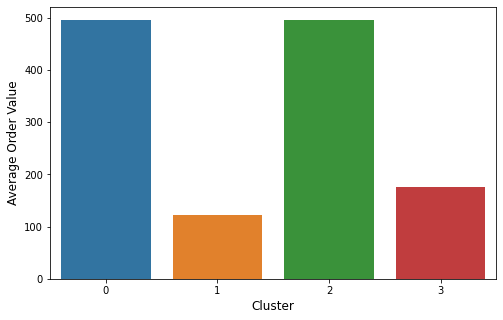

In [28]:
#Visualize the relationship between the average order value and each cluster
fig = plt.figure(figsize = (8,5))
sns.barplot(x = 'Cluster', 
            y = 'AvgOrderValue', 
            data = frame,
            ci = None)
# Add labels.
plt.xlabel("Cluster", size=12)
plt.ylabel("Average Order Value", size=12)

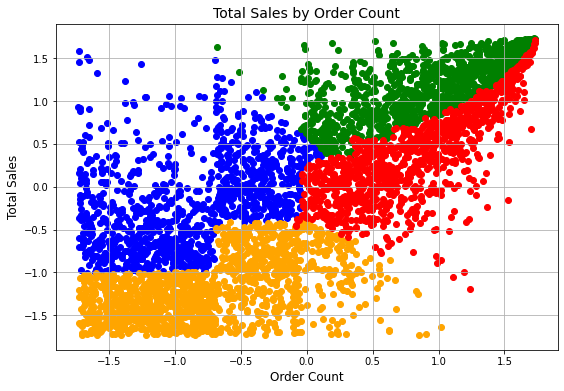

In [29]:
#Visualizing the clusters for total sales by order count.
fig = plt.figure(figsize = (9,6))
plt.scatter(
    f_c.loc[f_c['Cluster'] == 0]['OrderCount'], 
    f_c.loc[f_c['Cluster'] == 0]['TotalSales'],
    c='blue')

plt.scatter(
    f_c.loc[f_c['Cluster'] == 1]['OrderCount'], 
    f_c.loc[f_c['Cluster'] == 1]['TotalSales'],
    c='orange')

plt.scatter(
    f_c.loc[f_c['Cluster'] == 2]['OrderCount'], 
    f_c.loc[f_c['Cluster'] == 2]['TotalSales'],
    c='green')

plt.scatter(
    f_c.loc[f_c['Cluster'] == 3]['OrderCount'], 
    f_c.loc[f_c['Cluster'] == 3]['TotalSales'],
    c='red')

plt.title('Total Sales by Order Count', size=14)
plt.xlabel('Order Count', size=12)
plt.ylabel('Total Sales', size=12)

plt.grid()
plt.show()


    


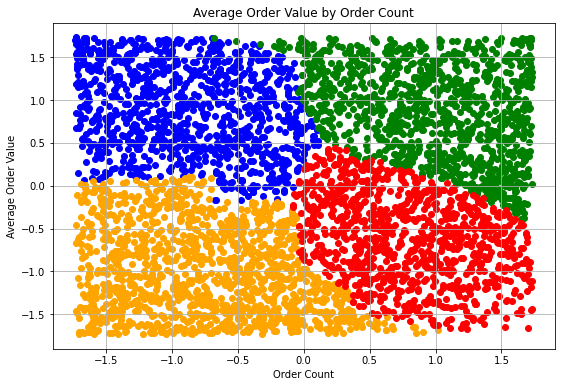

In [30]:
# Visualizing the clusters for average order value by order count
fig = plt.figure(figsize = (9,6))
plt.scatter(
    f_c.loc[f_c['Cluster'] == 0]['OrderCount'], 
    f_c.loc[f_c['Cluster'] == 0]['AvgOrderValue'],
    c='blue')

plt.scatter(
    f_c.loc[f_c['Cluster'] == 1]['OrderCount'], 
    f_c.loc[f_c['Cluster'] == 1]['AvgOrderValue'],
    c='orange')

plt.scatter(
    f_c.loc[f_c['Cluster'] == 2]['OrderCount'], 
    f_c.loc[f_c['Cluster'] == 2]['AvgOrderValue'],
    c='green')

plt.scatter(
    f_c.loc[f_c['Cluster'] == 3]['OrderCount'], 
    f_c.loc[f_c['Cluster'] == 3]['AvgOrderValue'],
    c='red')

plt.title('Average Order Value by Order Count')
plt.xlabel('Order Count')
plt.ylabel('Average Order Value')

plt.grid()
plt.show()

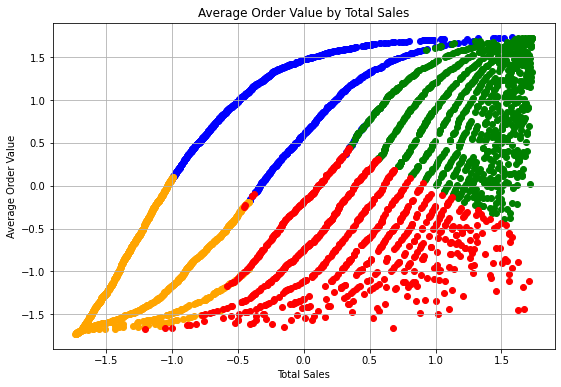

In [31]:
#Visualizing the clusters for average order value by total sales.
fig = plt.figure(figsize = (9,6))
plt.scatter(
    f_c.loc[f_c['Cluster'] == 0]['TotalSales'], 
    f_c.loc[f_c['Cluster'] == 0]['AvgOrderValue'],
    c='blue')

plt.scatter(
    f_c.loc[f_c['Cluster'] == 1]['TotalSales'], 
    f_c.loc[f_c['Cluster'] == 1]['AvgOrderValue'],
    c='orange')

plt.scatter(
    f_c.loc[f_c['Cluster'] == 2]['TotalSales'], 
    f_c.loc[f_c['Cluster'] == 2]['AvgOrderValue'],
    c='green')

plt.scatter(
    f_c.loc[f_c['Cluster'] == 3]['TotalSales'], 
    f_c.loc[f_c['Cluster'] == 3]['AvgOrderValue'],
    c='red')

plt.title('Average Order Value by Total Sales')
plt.xlabel('Total Sales')
plt.ylabel('Average Order Value')

plt.grid()
plt.show()

In [32]:
#identifing the customers who are in the highest value cluster. 
h_v_c = f_c.loc[f_c['Cluster'] == 0]
h_v_c

,TotalSales,OrderCount,AvgOrderValue,Cluster
CustomerID,,,,
12349.0,0.934456,-1.731457,1.702143,0
12350.0,-0.704704,-1.730664,0.669845,0
12354.0,0.520110,-1.729080,1.651440,0
12355.0,-0.360869,-1.728288,1.182429,0
12357.0,1.580137,-1.727495,1.731457,0
...,...,...,...,...
18240.0,-0.444055,-0.698366,1.066761,0
18246.0,-0.116064,-0.051100,0.404442,0
18251.0,1.480314,-0.696782,1.727495,0


In [33]:
# identifing the best-selling items within all the clusters.
pd.DataFrame(x.groupby('Description').count()['StockCode'].sort_values(ascending=False).head())

,StockCode
Description,
WHITE HANGING HEART T-LIGHT HOLDER,2070
REGENCY CAKESTAND 3 TIER,1905
JUMBO BAG RED RETROSPOT,1662
ASSORTED COLOUR BIRD ORNAMENT,1418
PARTY BUNTING,1416


In [34]:
#Identifing the best-selling items within the highest value cluster.
h_v_c = f_c.loc[f_c['Cluster'] == 0]

pd.DataFrame(x.loc[x['CustomerID'].isin(h_v_c.index)].groupby(
    'Description').count()['StockCode'].sort_values(ascending=False).head())

,StockCode
Description,
REGENCY CAKESTAND 3 TIER,175
WHITE HANGING HEART T-LIGHT HOLDER,155
ASSORTED COLOUR BIRD ORNAMENT,148
POSTAGE,140
SET OF 3 CAKE TINS PANTRY DESIGN,138
